# An analysis of paleo-present climate data

## Table of Contents

1. [Introduction](#Introduction)
2. [Analyse CO2 vs Temperature Anomaly from 800kyrs – present](#Analyse-CO2-vs-Temperature-Anomaly-from-800kyrs-–-present)



### Question

- Analyse CO2 vs Temperature Anomaly from 800kyrs – present.
- Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)
- Examine Irish context:
    - Climate change signals: (see Maynooth study: The emergence of a climate change signal in long-term Irish meteorological observations - ScienceDirect)
- Fuse and analyse data from various data sources and format fused data set as a pandas dataframe and export to csv and json formats
- For all of the above variables, analyse the data, the trends and the relationships between them (temporal leads/lags/frequency analysis).
- Predict global temperature anomaly over next few decades (synthesise data) and compare to published climate models if atmospheric CO2 trends continue
- Comment on accelerated warming based on very latest features (e.g. temperature/polar-ice-coverage

---

<a id='Introduction'></a>
## 1. Introduction

Fill in paragraph 1 

Fill in paragraph 2 


<a id='Analyse-CO2-vs-Temperature-Anomaly-from-800kyrs-–-present'></a>
## 2. Analyse CO2 vs Temperature Anomaly from 800kyrs – present

In [1]:
# Co2 Data

# Data & libaries

import pandas as pd

# CO2 Data import 'grl52461-sup-0003-supplementary file on Moodle'

# Note: data source file was manually altered due to difficulties creating a dataframe whereby data matched full-data set [tab 3 CO2 Composite].
    # 'date' and 'research' added into columns A & B to reflect colours on spreadsheet
    # CO2 Composite file was then copied into a csv and copied down as old data

# Load the main DataFrame
url = "https://raw.githubusercontent.com/nf-me/project2/master/data_files/old_data.csv?raw=true"
df_co2_1 = pd.read_csv(url)

# Rename columns
df_co2_1 = df_co2_1.rename(columns={'date': 'period', 
                        'Research': 'research_project', 
                        'gasage_yr_bp': 'gasage_yr_bp', 
                        'co2_ppmv': 'Co2', 
                        'sig_mean_co2_ppmv': 'sig_mean_co2_ppmv'})

# Adjusted Year Calculation
def calculate_adjusted_year(gas_age):
    if gas_age <= 0:
        # Years AD (Anno Domini): Positive, counting from year 0
        return int(1950 - gas_age)
    else:
        # Years BC (Before Christ): Negative, counting down to year 0
        return int(gas_age - 1950) * -1

# Apply the function to create the new 'Year' column
df_co2_1['Year'] = df_co2_1['gasage_yr_bp'].apply(calculate_adjusted_year)
df_co2_1.drop(columns=['period', 'research_project','gasage_yr_bp','sig_mean_co2_ppmv'], inplace=True)

# Define the new order of the columns
new_column_order = ['Year', 'Co2']

# Rearrange the columns
df_co2_1 = df_co2_1.reindex(columns=new_column_order)
df_co2_1['Co2'] = df_co2_1['Co2'].round(2)

In [2]:
import pandas as pd

# import CO2 values taken Mauna Loa fro, 1959 to 2024
# URL of the data file
url = 'https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_annmean_mlo.txt'

# Define column names
column_names = ['Year', 'Co2', 'unc']

# Import the data into a DataFrame
df_co2_2 = pd.read_csv(url, sep='\s+', comment='#', names=column_names, header=None, engine='python', skiprows=29)
df_co2_2.drop(columns=['unc'], inplace=True)
df_co2_2['Co2'] = df_co2_2['Co2'].round(2)

In [3]:
# merge the datasets on the overlapping perionds (1959 to 2001)

combined1_df = pd.merge(df_co2_1, df_co2_2, how='inner', left_on='Year', right_on='Year')

combined1_df = pd.merge(df_co2_1[df_co2_1['Year'].between(1959, 2001)], 
                     df_co2_2[df_co2_2['Year'].between(1959, 2001)], 
                     left_on='Year', right_on='Year')

combined1_df['Co2'] = combined1_df[['Co2_x', 'Co2_y']].mean(axis=1)
combined1_df.drop(columns=['Co2_x', 'Co2_y'], inplace=True)

# Now we have taken average of all those years that match for Co2 and created a df for them
# Nex we need to make the non-overlapping df and combine all of this data backtogether

# Non-overlapping data
combined2_df = df_co2_1[~df_co2_1['Year'].between(1959, 2001)]
combined3_df = df_co2_2[~df_co2_2['Year'].between(1959, 2001)]

# Combine all data back together
co2_df = pd.concat([combined1_df, combined2_df, combined3_df]).sort_values(by='Year')
co2_df['Co2'] = co2_df['Co2'].round(2)

# Create new column called co2_deviation (Co2 - mean)
co2_mean = co2_df['Co2'].mean()
co2_df['co2_dev'] = co2_df['Co2'] - co2_mean
co2_df['co2_dev'] = co2_df['co2_dev'].round(2)

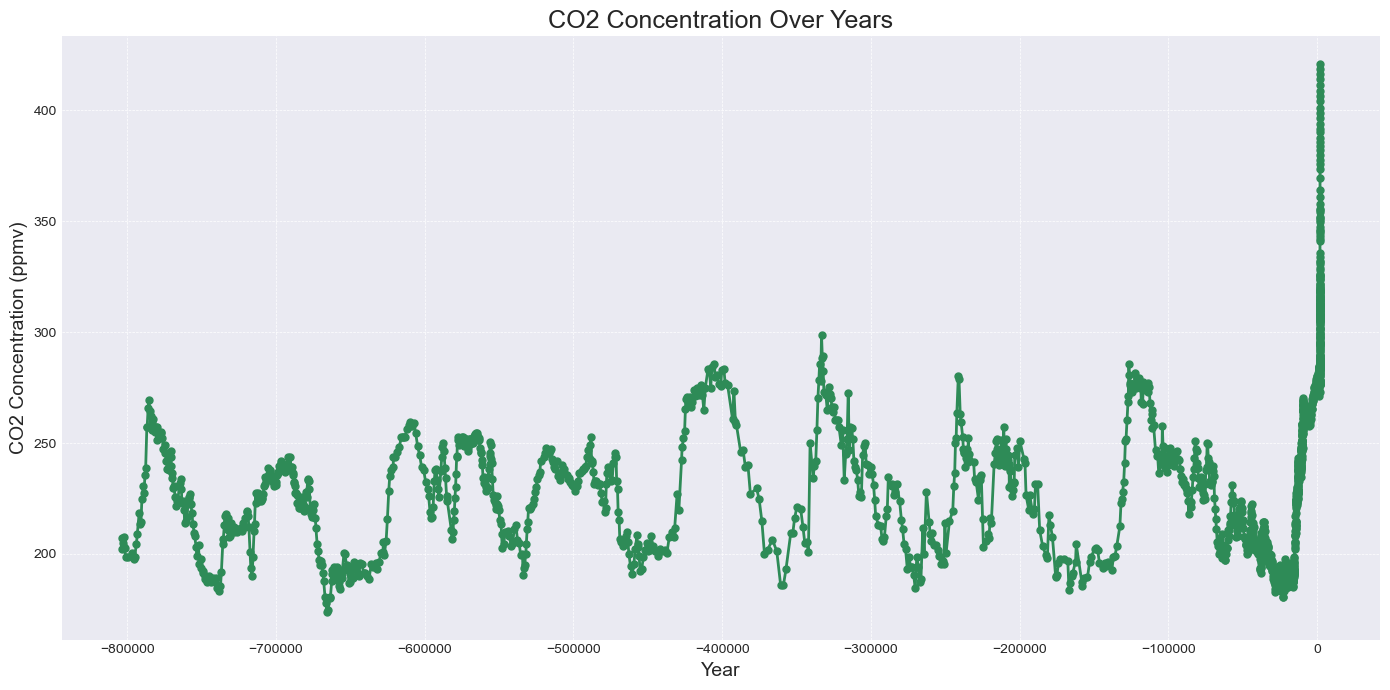

In [56]:
# Show Co2 over Years
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(14, 7))
plt.plot(co2_df['Year'], co2_df['Co2'], marker='o', linestyle='-', linewidth=2, color='seagreen', markersize=5)
plt.title('CO2 Concentration Over Years', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO2 Concentration (ppmv)', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [6]:
# Temperature Data

import pandas as pd

# URLs of the datasets
url1 = "https://raw.githubusercontent.com/nf-me/project2/master/data_files/edc3deuttemp2007.csv"
url2 = "https://raw.githubusercontent.com/nf-me/project2/master/data_files/nasa_globaltemp.csv"

# Reading the data into DataFrames
temp_1 = pd.read_csv(url1)
temp_2 = pd.read_csv(url2)

In [36]:
# df_temp1

def calculate_adjusted_year(Age):
    if Age <= 0:
        # Years AD (Anno Domini): Positive, counting from year 0
        return int(1950 - Age)
    else:
        # Years BC (Before Christ): Negative, counting down to year 0
        return int(Age - 1950) * -1

temp_1['Year'] = temp_1['Age'].apply(calculate_adjusted_year)    

# Rename columns
temp_1 = temp_1.rename(columns={'Temperature': 'Temp'})

new_column_order = ['Year', 'Temp']
df_temp1 = temp_1.reindex(columns=new_column_order)


# df_temp2

# Convert all temperature columns to numeric, invalid parsing will be set as NaN
for col in temp_2.columns[2:]:
    temp_2[col] = pd.to_numeric(temp_2[col], errors='coerce')

# Baseline period to create anomaly
baseline_years = temp_2[(temp_2['Year'] >= 1961) & (temp_2['Year'] <= 1990)]
baseline_avg = baseline_years['Temp'].mean()
temp_2['Temp'] = temp_2['Temp'] - baseline_avg

# Define the new order of the columns
new_column_order = ['Year', 'Temp']

# Rearrange the columns
df_temp2 = temp_2.groupby('Year', as_index=False)['Temp'].mean()

In [54]:
# Merge the DataFrames on 'Year'
temp_df = pd.merge(df_temp1, df_temp2, on='Year', how='outer', suffixes=('_1', '_2'))

# Compute the average temperature where both values are present, otherwise take the non-NaN value
temp_df['temp_anomaly'] = temp_df[['Temp_1', 'Temp_2']].mean(axis=1, skipna=True)
temp_df['Temp_1'] = temp_df['Temp_1'].round(2)
temp_df['Temp_2'] = temp_df['Temp_2'].round(2)
temp_df['temp_anomaly'] = temp_df['temp_anomaly'].round(2)
temp_df.sort_values(by='Year')
# This new column 'temp_average' now contains the average of the temperatures from both DataFrames for each year.

,Year,Temp_1,Temp_2,temp_anomaly
5798,-798639,-8.92,NaN,-8.92
5797,-797551,-8.88,NaN,-8.88
5796,-796493,-8.54,NaN,-8.54
5795,-795458,-8.73,NaN,-8.73
5794,-794499,-8.53,NaN,-8.53
...,...,...,...,...
5918,2015,NaN,0.81,0.81
5919,2016,NaN,1.02,1.02
5920,2017,NaN,0.91,0.91
5921,2018,NaN,0.82,0.82


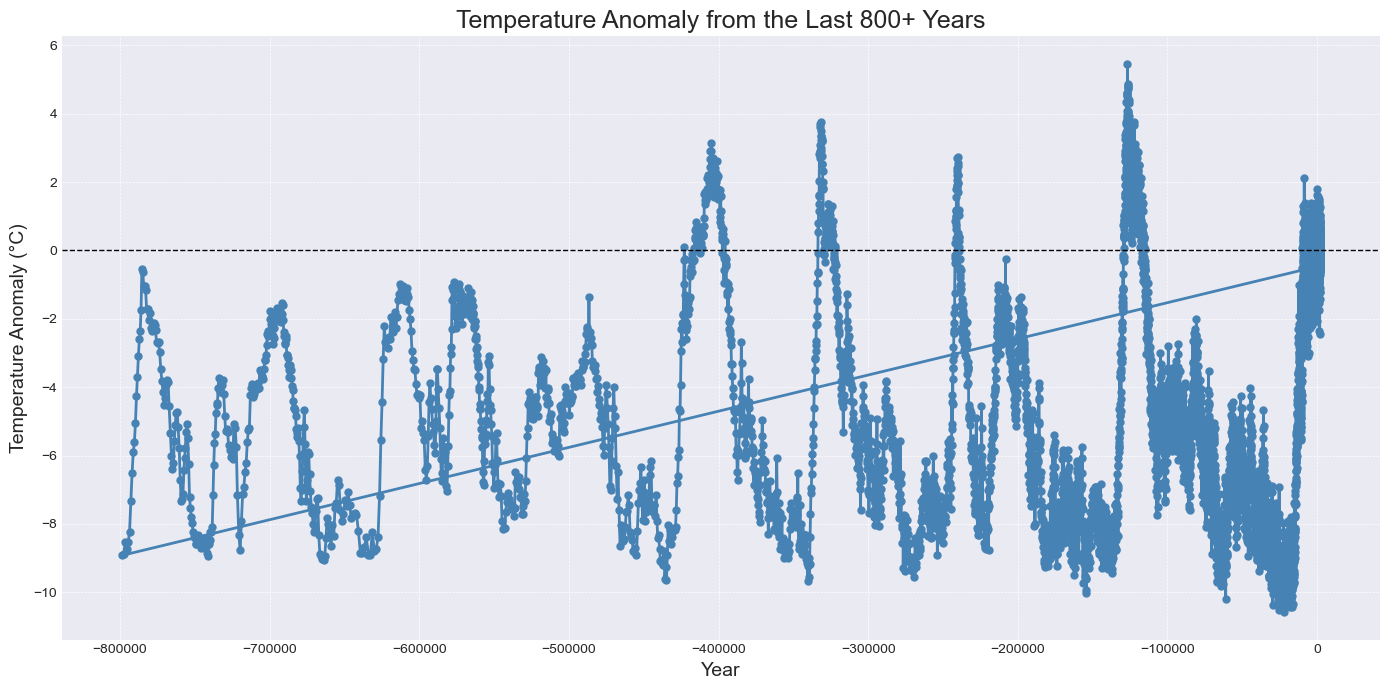

In [53]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(14, 7))
plt.plot(temp_df['Year'], temp_df['temp_anomaly'], marker='o', linestyle='-', linewidth=2, color='steelblue', markersize=5)
plt.title('Temperature Anomaly from the Last 800+ Years', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Temperature Anomaly (°C)', fontsize=14)

# Add a horizontal line at y=0 to indicate the baseline
plt.axhline(y=0, color='black', linewidth=1, linestyle='--')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

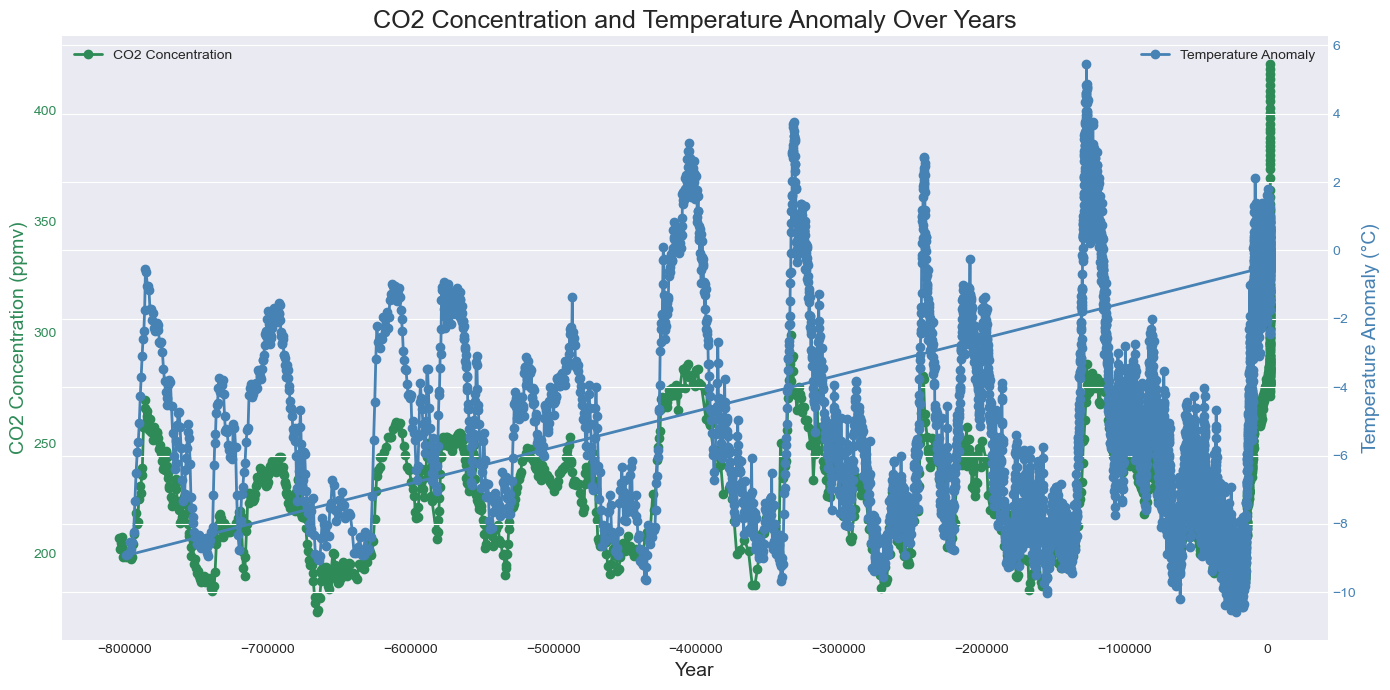

In [58]:
# Combine datasets
combined_df = pd.merge(co2_df, temp_df, on='Year', how='outer', suffixes=('_co2', '_temp'))

# Comparing both visual

import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
fig, ax1 = plt.subplots(figsize=(14, 7))
color = 'seagreen'
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('CO2 Concentration (ppmv)', fontsize=14, color=color)
ax1.plot(co2_df['Year'], co2_df['Co2'], color=color, marker='o', linestyle='-', linewidth=2, label='CO2 Concentration')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(False)

# twin y-axis to share the same x-axis for teperature anomaly
ax2 = ax1.twinx()
color = 'steelblue'
ax2.set_ylabel('Temperature Anomaly (°C)', fontsize=14, color=color)
ax2.plot(temp_df['Year'], temp_df['temp_anomaly'], color=color, marker='o', linestyle='-', linewidth=2, label='Temperature Anomaly')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('CO2 Concentration and Temperature Anomaly Over Years', fontsize=18)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()
plt.show()

In [63]:
# Generate descriptive statistics
descriptive_stats = combined_df.describe()

# Display the descriptive statistics
print(descriptive_stats)

                Year          Co2      co2_dev       Temp_1      Temp_2  \
count    7702.000000  1923.000000  1923.000000  5789.000000  193.000000   
mean  -200576.689172   237.421622     0.001622    -4.575217   -0.099741   
std    216743.711022    39.656785    39.656785     3.448436    0.351496   
min   -803718.000000   173.710000   -63.710000   -10.580000   -0.640000   
25%   -307866.750000   205.145000   -32.275000    -7.450000   -0.340000   
50%   -116157.000000   233.000000    -4.420000    -5.200000   -0.170000   
75%    -30823.250000   259.550000    22.130000    -1.810000    0.020000   
max      2023.000000   421.080000   183.660000     5.460000    1.020000   

       temp_anomaly  
count   5977.000000  
mean      -4.434897  
std        3.482186  
min      -10.580000  
25%       -7.390000  
50%       -5.050000  
75%       -1.420000  
max        5.460000  
